In [36]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
#import seaborne as sns


In [37]:
tea_tra = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_tra.csv", delimiter=';', decimal=',')
tea_tra

,Pipelines,Pipeline High,Pipeline Low,Pipeline Retrofit,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Technical Lifetime (y),40.00,40.00,40.00,NaN,NaN,NaN
1,Amortisation factor (%),0.08,0.08,0.08,NaN,NaN,NaN
2,CAPEX (mio$/km),1.21,NaN,NaN,NaN,NaN,NaN
3,CAPEX ($/tpa/km),3.56,1.33,0.73,NaN,NaN,NaN
4,design throughput (kt H2/y),340.00,3400.00,3400.00,NaN,NaN,NaN
5,real throughput (kt H2/y),255.00,NaN,NaN,NaN,NaN,NaN
6,OPEX & Fuel (% of CAPEX/a),0.05,0.05,0.05,NaN,NaN,NaN
7,utilisation (%),0.75,0.75,0.75,NaN,NaN,NaN
8,Cost of pipeline transport ($/1000km/kg H2),0.64,0.24,0.13,NaN,NaN,NaN
9,Interest rate (%),0.08,0.08,0.08,NaN,NaN,NaN


In [38]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_pipe.csv", delimiter=';', decimal=',')
tea_pipe

,Pipelines,High,Low,Retrofit,Unnamed: 4
0,Discount rate,0.080,0.080,0.080,NaN
1,Technical Lifetime (y),40.000,40.000,40.000,NaN
2,Amortisation factor (%),0.084,0.084,0.084,NaN
3,CAPEX (mio$/km),1.210,NaN,NaN,NaN
4,CAPEX ($/tpa/km),3.560,1.330,0.730,NaN
5,design throughput (kt H2/y),340.000,3400.000,3400.000,NaN
6,real throughput (kt H2/y),255.000,NaN,NaN,NaN
7,OPEX & Fuel (% of CAPEX/a),0.050,0.050,0.050,NaN
8,utilisation (%),0.750,0.750,0.750,NaN
9,Cost of pipeline transport ($/1000km/kg H2),0.640,0.240,0.130,NaN


In [39]:
#Definition of variables for pipeline transport costs
tra_d = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/transport_distance.csv", delimiter=';', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [40]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe[tea_pipe.Pipelines == 'Discount rate']['High'].values)
i_tra

0.08

In [98]:
tea_liq = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_liquefaction.csv", delimiter=';', decimal=',')
tea_liq

,Liquefaction,LH2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Discount rate,0.080000,NaN,NaN,NaN,NaN
1,Lifetime (years),30.000000,NaN,NaN,NaN,NaN
2,Amortisation Factor,0.088827,NaN,NaN,NaN,NaN
3,Installed capacity (ktH2/y),260.000000,NaN,NaN,NaN,NaN
4,CAPEX (USD million),1400.000000,NaN,NaN,NaN,NaN
5,Annual OPEX (% of CAPEX),0.040000,NaN,NaN,NaN,NaN
6,Availability,0.900000,NaN,NaN,NaN,NaN
7,CAPEX ($/tpa),5384.615385,NaN,NaN,NaN,NaN
8,Annual OPEX ($/t),215.384615,NaN,NaN,NaN,NaN
9,Electricity use (kWh/kgH2),6.100000,NaN,NaN,NaN,NaN


# Pipeline transport costs

In [73]:
# Economic lifetime for pipelines
l_pipe = float(tea_pipe[tea_pipe.Pipelines == 'Technical Lifetime (y)']['High'].values)
l_pipe

40.0

In [74]:
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra)**l_pipe)/(((1 + i_tra)**l_pipe) - 1)
alpha

0.08386016150058534

In [75]:
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe[tea_pipe.Pipelines == 'utilisation (%)']['High'].values)
pipe_use

0.75

In [76]:
capex_pipe_offshore_EHB = float(tea_pipe[tea_pipe.Pipelines == 'CAPEX ($/tpa/km)']['High'].values)
capex_pipe_offshore_EHB

3.56

In [77]:
# Capex for onshore pipelines constant over time (3.56) divided by pipeline utilisation in [$/tpa/km]
capex_on_high = capex_pipe_offshore_EHB/pipe_use
capex_on_high

4.746666666666667

In [78]:
opex_on_share = float(tea_pipe[tea_pipe.Pipelines == 'OPEX & Fuel (% of CAPEX/a)']['High'].values)
opex_on_share

0.05

In [79]:
# Opex for onshore pipelines constant over time (opex and fuel use in % of capex/a) in [$/tpa/km]
opex_on_high = capex_on_high * opex_on_share
opex_on_high

0.23733333333333337

In [80]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [81]:
# Amortisation factor for offshore pipelines
alpha = alpha
alpha

0.08386016150058534

In [82]:
# Capex for offshore pipelines [$/km] - Offshore multiplicator = 1.25
capex_off_high = 1.25 * capex_on_high/pipe_use
capex_off_high

7.911111111111111

In [83]:
# Opex for offshore pipelines [$/km/a]
opex_off_high = 1.25 * opex_on_high
opex_off_high

0.2966666666666667

In [84]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

In [85]:
years = np.arange(2020,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_costs'])
result.index.name = 'Years'
result

,Pipeline_costs
Years,
2020,NaN
2021,NaN
2022,NaN
2023,NaN
2024,NaN
2025,NaN
2026,NaN
2027,NaN
2028,NaN


In [86]:
# Costs for pipeline transport [$/1000km/kg_h2] - assumed to be constant over time
TC_pipe_high = ((alpha * capex_on_high + opex_on_high) * d_on + (alpha * capex_off_high + opex_off_high) * d_off)/1000
TC_pipe_high

0.8146777893376214

# Total pipeline transport costs

In [87]:
for year in years:
    result.Pipeline_costs.loc[year] = TC_pipe_high
result

,Pipeline_costs
Years,
2020,0.814678
2021,0.814678
2022,0.814678
2023,0.814678
2024,0.814678
2025,0.814678
2026,0.814678
2027,0.814678
2028,0.814678


In [88]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'Pipeline_costs.csv')
result.to_csv(output_file, sep = ';')

In [89]:
# Costs for seaborne transport via ship [$/kg_h2]

TC_sea = LC + EC + SC * IC


NameError: name 'LC' is not defined

In [90]:
## Definition of variables for the liquefaction costs
tea_liq = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_liquefaction.csv", delimiter=';', decimal=',')
tea_liq

,Liquefaction,LH2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Discount rate,0.080000,NaN,NaN,NaN,NaN
1,Lifetime (years),30.000000,NaN,NaN,NaN,NaN
2,Amortisation Factor,0.088827,NaN,NaN,NaN,NaN
3,Installed capacity (ktH2/y),260.000000,NaN,NaN,NaN,NaN
4,CAPEX (USD million),1400.000000,NaN,NaN,NaN,NaN
5,Annual OPEX (% of CAPEX),0.040000,NaN,NaN,NaN,NaN
6,Availability,0.900000,NaN,NaN,NaN,NaN
7,CAPEX ($/tpa),5384.615385,NaN,NaN,NaN,NaN
8,Annual OPEX ($/t),215.384615,NaN,NaN,NaN,NaN
9,Electricity use (kWh/kgH2),6.100000,NaN,NaN,NaN,NaN


In [91]:
p_electricity = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/p_electricity.csv", delimiter=';', decimal=',')
p_electricity


,Years,United Arab Emirates,Angola,Argentina,Austria,Australia,Azerbaijan,Estonia,Bangladesh,Belgium,...,Venezuela,Yemen,Croatia,Mozambique,Vietnam,Philippines,Iceland,Papua New Guinea,Cameroon,South Africa
0,2020,36.301651,121.494032,37.961027,46.683533,72.846428,12.385695,46.683533,30.935708,46.683533,...,37.961027,36.301651,46.683533,121.494032,42.402642,42.402642,46.683533,42.402642,121.494032,121.494032
1,2021,36.764515,119.445089,38.086072,47.002654,69.396730,12.730095,47.002654,34.377750,47.002654,...,38.086072,36.764515,47.002654,119.445089,44.089299,44.089299,47.002654,44.089299,119.445089,119.445089
2,2022,37.137776,119.580409,39.032196,47.209289,66.622798,12.992081,47.209289,37.892094,47.209289,...,39.032196,37.137776,47.209289,119.580409,45.936088,45.936088,47.209289,45.936088,119.580409,119.580409
3,2023,37.447974,124.653779,40.033404,47.346703,64.898776,13.213518,47.346703,42.347643,47.346703,...,40.033404,37.447974,47.346703,124.653779,47.946139,47.946139,47.346703,47.946139,124.653779,124.653779
4,2024,37.747898,131.547459,41.148255,47.274782,64.515503,13.398698,47.274782,48.070973,47.274782,...,41.148255,37.747898,47.274782,131.547459,50.057150,50.057150,47.274782,50.057150,131.547459,131.547459
5,2025,38.034395,137.405324,42.353416,46.957092,64.897234,13.563521,46.957092,57.631134,46.957092,...,42.353416,38.034395,46.957092,137.405324,52.193834,52.193834,46.957092,52.193834,137.405324,137.405324
6,2026,38.325658,141.246042,43.577189,46.416301,65.154315,13.733206,46.416301,70.329786,46.416301,...,43.577189,38.325658,46.416301,141.246042,54.433745,54.433745,46.416301,54.433745,141.246042,141.246042
7,2027,38.655501,142.819290,44.818521,46.118220,65.256396,13.929400,46.118220,81.379762,46.118220,...,44.818521,38.655501,46.118220,142.819290,57.196590,57.196590,46.118220,57.196590,142.819290,142.819290
8,2028,39.015448,143.098086,46.021991,45.738344,65.134265,14.150387,45.738344,90.169686,45.738344,...,46.021991,39.015448,45.738344,143.098086,60.841314,60.841314,45.738344,60.841314,143.098086,143.098086
9,2029,39.420264,143.128137,47.209332,45.399899,64.811898,14.389268,45.399899,83.519064,45.399899,...,47.209332,39.420264,45.399899,143.128137,65.569751,65.569751,45.399899,65.569751,143.128137,143.128137


In [100]:
# WACC for liquefaction plant in %
i_liq = 0.08
i_liq

0.08

In [101]:
# Economic lifetime for the liquefaction plant
l_liq = 30
l_liq

30

In [102]:
# Amortisation factor alpha for the liquefaction plant
alpha_liq = (i_liq * (1 + i_liq) ** l_liq) /(((1 + i_liq) ** l_liq) - 1)
alpha_liq


0.08882743338727227

In [103]:
# Capex for the liquefaction plant converted from [$/tpa] to [$/kg/a]
capex_liq_base = float(tea_liq[tea_liq.Liquefaction == 'CAPEX  ($/tpa)']['Liquefaction Parameter'].values)/1000
capex_liq_base

KeyError: 'Liquefaction Parameter'

In [104]:
# Plant availability of 90%
liq_use = float(tea_liq[tea_liq.Liquefaction == 'Availability']['Liquefaction Parameter'].values)
liq_use

KeyError: 'Liquefaction Parameter'

In [105]:
# Capex for the liquefaction plant [$/tpa] divided by plant availability of 90%
capex_liq = capex_liq_base/liq_use
capex_liq


NameError: name 'capex_liq_base' is not defined

In [106]:
# Annual OPEX (% of CAPEX)
opex_share_liq = float(tea_liq[tea_liq.Liquefaction == 'Annual OPEX (% of CAPEX)']['Liquefaction Parameter'].values)
opex_share_liq

KeyError: 'Liquefaction Parameter'

In [107]:
# Opex for the liquefaction plant [$/tpa]
opex_liq = capex_liq * opex_share_liq
opex_liq

NameError: name 'capex_liq' is not defined

In [108]:
# Electricty consumption for the liquefaction in [kWh/kg_h2]
el_liq = float(tea_liq[tea_liq.Liquefaction == 'Electricity use (kWh/kgH2)']['Liquefaction Parameter'].values)
el_liq

KeyError: 'Liquefaction Parameter'

In [109]:
# Price for the electricity in year y and country m converted from [$/MWh] to [$/kWh]
p_el = float(p_electricity[p_electricity.Years == 2020]['Norway'].values)/1000
p_el


0.0466835326539

In [110]:
# Read time relevant parameter for costs

liq_time_inputs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/liquefaction_time_inputs.csv', delimiter=';', decimal=',')
liq_time_inputs

,Years,CAPEX ($/tpa) Liquefaction,OPEX ($/t/a) Liquefaction,Elec Use (kwh/kg H2) Liquefaction
0,2020,5982.905983,239.316239,6.1000
1,2021,5923.076923,236.923077,6.0390
2,2022,5863.247863,234.529914,5.9780
3,2023,5803.418803,232.136752,5.9170
4,2024,5743.589744,229.743590,5.8560
5,2025,5683.760684,227.350427,5.7950
6,2026,5623.931624,224.957265,5.7340
7,2027,5564.102564,222.564103,5.6730
8,2028,5504.273504,220.170940,5.6120
9,2029,5444.444444,217.777778,5.5510


In [111]:
# Definition of the cost calculation function for liquefaction costs. Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh]
def calculate_liq_costs(alpha_liq, capex_liq_y, opex_liq_y, el_liq_y, p_el_y):

    result = float((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y/1000)

    return result

In [112]:
# Calculation of liquefaction costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2020,2051)
result = pd.DataFrame(index=years, columns=['Liquefaction_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_liq_y = float(liq_time_inputs[liq_time_inputs.Years == year]['CAPEX ($/tpa) Liquefaction'])
    opex_liq_y = float(liq_time_inputs[liq_time_inputs.Years == year]['OPEX ($/t/a) Liquefaction'])
    el_liq_y = float(liq_time_inputs[liq_time_inputs.Years == year]['Elec Use (kwh/kg H2) Liquefaction'])
    p_el_y = float(p_electricity[p_electricity.Years == year]['Norway'])

    # calculate costs of specific year
    result.Liquefaction_costs.loc[year] = calculate_liq_costs(alpha_liq=alpha_liq, capex_liq_y=capex_liq_y, opex_liq_y=opex_liq_y, el_liq_y=el_liq_y, p_el_y=p_el_y)

result

,Liquefaction_costs
Years,
2020,1.055532
2021,1.046904
2022,1.037564
2023,1.02779
2024,1.016773
2025,1.004341
2026,0.990668
2027,0.978438
2028,0.965785


In [113]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'Liquefaction_costs.csv')
result.to_csv(output_file, sep = ';')

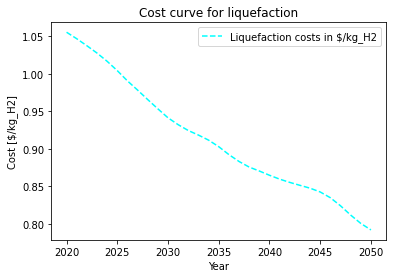

In [114]:
# Plot cost curve of hydrogen production from NGR with CCS
plt.plot(result, color = 'cyan', linestyle = 'dashed')
#plt.ylim(ymin=0)
plt.title('Cost curve for liquefaction')
plt.legend(['Liquefaction costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()

In [597]:
#EXPORT TERMINAL

In [379]:
# Definition of variables for export terminal cost
tea_terminals = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_terminals.csv", delimiter=';', decimal=',')
tea_terminals

,Terminals,Export_Terminal,Import_Terminal,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Technical Lifetime (y),30.000000,30.000000,NaN,NaN,NaN
1,Amortisation Factor,0.088827,0.088827,NaN,NaN,NaN
2,Capacity/tank (tLH2),3190.000000,3550.000000,NaN,NaN,NaN
3,Storage length per load (d),3.000000,20.000000,NaN,NaN,NaN
4,Yearly capacity (t H2 /y),388116.666700,64787.500000,NaN,NaN,NaN
5,CAPEX/tank (USD million),290.000000,320.000000,NaN,NaN,NaN
6,CAPEX ($/tpa),747.198008,4939.224387,NaN,NaN,NaN
7,Annual OPEX (% of CAPEX),0.040000,0.040000,NaN,NaN,NaN
8,Electricity use (kWh/kgH2),0.610000,0.200000,NaN,NaN,NaN
9,Cost of Export without electricity ($/kg H2),0.096260,0.636308,NaN,NaN,NaN


In [380]:
i_tra

0.08

In [381]:
# Lifetime of import and export terminals
l_ter = float(tea_terminals[tea_terminals.Terminals == 'Technical Lifetime (y)']['Export_Terminal'].values)
l_ter

30.0

In [382]:
# Amortisation factor for the export terminal
alpha_et = (i_tra * (1 + i_tra) ** l_ter) / (((1 + i_tra) ** l_ter) - 1)
alpha_et


0.08882743338727227

In [383]:
# Capex for the export terminal in [$/tpa]
capex_et_base = float(tea_terminals[tea_terminals.Terminals == 'CAPEX ($/tpa)']['Export_Terminal'].values)
capex_et_base

747.1980075

In [384]:
# Opex in % of capex
opex_share_et = float(tea_terminals[tea_terminals.Terminals == 'Annual OPEX (% of CAPEX)']['Export_Terminal'].values)
opex_share_et

0.04

In [385]:
# Opex for the export terminal in [$/tpa]
opex_et = opex_share_et * capex_et_base
opex_et

29.8879203

In [386]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_terminals[tea_terminals.Terminals == 'Electricity use (kWh/kgH2)']['Export_Terminal'].values)
el_et

0.61

In [387]:
# Price of electricity in [$/kWh] per year and country
p_el

0.0466835326539

In [388]:
# Boil-off hydrogen in [%/day]
b_et = float(tea_terminals[tea_terminals.Terminals == 'Boil-off (%/day)']['Export_Terminal'].values)
b_et

0.001

In [389]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_terminals[tea_terminals.Terminals == 'Storage length per load (d)']['Export_Terminal'].values)
t_et

3.0

import nbimporter
import Production.ipynb


In [137]:
# Cost of transported hydrogen in [$/kg_h2] in year y
lcoh_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LCOH_NGR.csv", delimiter=';', decimal=',')
lcoh_ngr

,Years,LCOH_NGR
0,2020,1.540664228375292
1,2021,1.5795795259119467
2,2022,4.677234866618601
3,2023,4.444640127690195
4,2024,3.516538989006849
5,2025,3.619924858455304
6,2026,3.728883239375647
7,2027,3.8427065897619217
8,2028,3.962095830621936
9,2029,4.08776221557105


In [138]:
ter_time_inputs = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/terminals_time_inputs.csv", delimiter=';', decimal=',')
ter_time_inputs

,Years,CAPEX (tpa) Export Terminal,OPEX (tpa) Export Terminal,Electricity Use (kwh/kg H2) Export Terminal,Boil-off (kg/kg H2) Export Terminal,CAPEX (tpa) Import Terminal,OPEX (tpa) Import Terminal,Electricity Use (kwh/kg H2) Import Terminal,Boil-off (kg/kg H2) Import Terminal
0,2020,747.198008,29.887920,0.61,0.003,4939.224387,197.568975,0.2,0.02
1,2021,739.726027,29.589041,0.61,0.003,4889.832144,195.593286,0.2,0.02
2,2022,732.254047,29.290162,0.61,0.003,4840.439900,193.617596,0.2,0.02
3,2023,724.782067,28.991283,0.61,0.003,4791.047656,191.641906,0.2,0.02
4,2024,717.310087,28.692403,0.61,0.003,4741.655412,189.666216,0.2,0.02
5,2025,709.838107,28.393524,0.61,0.003,4692.263168,187.690527,0.2,0.02
6,2026,702.366127,28.094645,0.61,0.003,4642.870924,185.714837,0.2,0.02
7,2027,694.894147,27.795766,0.61,0.003,4593.478680,183.739147,0.2,0.02
8,2028,687.422167,27.496887,0.61,0.003,4544.086436,181.763457,0.2,0.02
9,2029,679.950187,27.198007,0.61,0.003,4494.694193,179.787768,0.2,0.02


In [139]:
# Definition of the cost calculation function for the Export terminal.
# Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh], boil off in [%/d], storage time in days, lcoh in [$/kg_h2]
def calculate_export_terminal_costs(alpha_et, capex_et_y, opex_et_y, el_et, p_el_y, lcoh_ngr_y):
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + el_et * p_el_y/1000 + b_et * t_et * lcoh_ngr_y

    return result

In [140]:
#Calculation of export terminal costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Export_terminal_costs'])
result.index.name = 'Years'

In [141]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(ter_time_inputs[ter_time_inputs.Years == year]['CAPEX (tpa) Export Terminal'])
    opex_et_y = float(ter_time_inputs[ter_time_inputs.Years == year]['OPEX (tpa) Export Terminal'])
    p_el_y = float(p_electricity[p_electricity.Years == year]['Norway'])
    lcoh_ngr_y = float(lcoh_ngr[lcoh_ngr.Years == year]['LCOH_NGR'])

    # calculate costs of specific year
    result.Export_terminal_costs.loc[year] = calculate_export_terminal_costs(alpha_et=alpha_et, capex_et_y=capex_et_y,
                                                              opex_et_y=opex_et_y, el_et=el_et, p_el_y=p_el_y, lcoh_ngr_y=lcoh_ngr_y)

result

NameError: name 'alpha_et' is not defined

In [142]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

In [143]:
# Plot cost curve of hydrogen production from NGR with CCS
plt.plot(EC, color='red', linestyle='dashed')
plt.title('Export terminal costs over time')
plt.legend(['Export terminal costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()

NameError: name 'EC' is not defined

In [144]:
#SHIPPING

In [145]:
#Definition of variables for shipping cost SC
tea_ship = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_shipping.csv", delimiter = ';', decimal = ',')
tea_ship

,Shipping,Shipping Parameter,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Technical Lifetime (y),30.000000,NaN,NaN,NaN
1,Amortisation Factor,0.088827,NaN,NaN,NaN
2,Capacity/ship (tH2 ),11000.000000,NaN,NaN,NaN
3,CAPEX/ship (USD million),412.000000,NaN,NaN,NaN
4,CAPEX ($/kg),37.000000,NaN,NaN,NaN
5,Ship speed (km/h),30.000000,NaN,NaN,NaN
6,Berthing time (hours),48.000000,NaN,NaN,NaN
7,Annual OPEX (% of CAPEX),0.040000,NaN,NaN,NaN
8,Fuel use (MJ/km),1487.000000,NaN,NaN,NaN
9,Fuel use (kg H2/t/km),0.001127,NaN,NaN,NaN


In [146]:
# Technical lifetime of ships in years
l_ship = float(tea_ship[tea_ship.Shipping == 'Technical Lifetime (y)']['Shipping Parameter'].values)
l_ship

30.0

In [147]:
# Amortisation factor for shipping
alpha_ship = (i_tra * (1 + i_tra) ** l_ship) / (((1 + i_tra) ** l_ship) - 1)
alpha_ship


0.08882743338727227

In [148]:
# Cost of one ship in Mio.$
capex_ship_base = float(tea_ship[tea_ship.Shipping == 'CAPEX/ship (USD million)']['Shipping Parameter'].values)
capex_ship_base

412.0

In [149]:
#Capacity of a ship in t_h2
capa_ship = float(tea_ship[tea_ship.Shipping == 'Capacity/ship (tH2 )']['Shipping Parameter'].values)
capa_ship

11000.0

In [150]:
# Capex for shipping in [$/kg_h2]
capex_ship = capex_ship_base / capa_ship * 1000
capex_ship

37.45454545454545

In [151]:
# Opex shipping share of Capex in %/a
opex_share_ship = float(tea_ship[tea_ship.Shipping == 'Annual OPEX (% of CAPEX)']['Shipping Parameter'].values)
opex_share_ship

0.04

In [152]:
# Opex for shipping in [$/kg_h2/a]
opex_ship = opex_share_ship * capex_ship
opex_ship

1.498181818181818

In [153]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea


602.403

In [154]:
# Ship speed in [km/h]
v_ship = float(tea_ship[tea_ship.Shipping == 'Ship speed (km/h)']['Shipping Parameter'].values)
v_ship

30.0

In [155]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_ship[tea_ship.Shipping == 'Berthing time (hours)']['Shipping Parameter'].values)
h_ship


48.0

In [156]:
# Boil-off when shipping in [%/h]
b_ship = float(tea_ship[tea_ship.Shipping == 'Boil off (%per day)']['Shipping Parameter'].values)
b_ship

0.002

In [157]:
# Fuel consumption of a ship in [kg_h2/km]
f_ship = float(tea_ship[tea_ship.Shipping == 'Fuel use (kg H2/t/km)']['Shipping Parameter'].values)
f_ship


0.001126891

In [158]:
# Shipping cost in [$/kg_h2] including: Yearly capex per kg of transport capacity; Loads per year; share of load left after shipping; Cost of boil-off
SC = (alpha_ship * capex_ship + opex_ship)/(8760/(2*(d_sea/v_ship + h_ship)))/((1-(b_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (b_ship * d_sea/v_ship + f_ship * d_sea) * lcoh_ngr_y)
SC

0.05400553990088198

In [159]:
ship_time_inputs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/shipping_time_inputs.csv', delimiter=';', decimal=',')
ship_time_inputs

,Years,CAPEX ($/kg) Shipping,OPEX ($/kg/a) Shipping
0,2020,37.454545,1.498182
1,2021,37.080000,1.483200
2,2022,36.705455,1.468218
3,2023,36.330909,1.453236
4,2024,35.956364,1.438255
5,2025,35.581818,1.423273
6,2026,35.207273,1.408291
7,2027,34.832727,1.393309
8,2028,34.458182,1.378327
9,2029,34.083636,1.363345


In [160]:
# Definition of the cost calculation function for the maritime shipping. Time relevant variables = capex [$/kg], opex [$/kg/a], lcoh in [$/kg_h2]
def calculate_ship_costs(alpha_ship, capex_ship_y, opex_ship_y, d_sea, v_ship, h_ship, b_ship, f_ship, lcoh_ngr_y):
    result = (alpha_ship * capex_ship_y + opex_ship_y)/(8760/(2*(d_sea/v_ship + h_ship)))/((1-(b_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (b_ship * d_sea/v_ship + f_ship * d_sea) * lcoh_ngr_y)

    return result

In [161]:
# Calculation of shipping costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(ship_time_inputs[ship_time_inputs.Years == year]['CAPEX ($/kg) Shipping'])
    opex_ship_y = float(ship_time_inputs[ship_time_inputs.Years == year]['OPEX ($/kg/a) Shipping'])
    lcoh_ngr_y = float(lcoh_ngr[lcoh_ngr.Years == year]['LCOH_NGR'])

    # calculate costs of specific year
    result.Shipping_costs.loc[year] = calculate_ship_costs(alpha_ship=alpha_ship, capex_ship_y=capex_ship_y, opex_ship_y=opex_ship_y, d_sea=d_sea, v_ship=v_ship, h_ship=h_ship, b_ship=b_ship, f_ship=f_ship, lcoh_ngr_y=lcoh_ngr_y)

result

,Shipping_costs
Years,
2020,0.054006
2021,0.05241
2022,0.02017
2023,0.020925
2024,0.025628
2025,0.024707
2026,0.023801
2027,0.022914
2028,0.022046


In [136]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Shipping_costs.csv')
result.to_csv(output_file, sep=';')

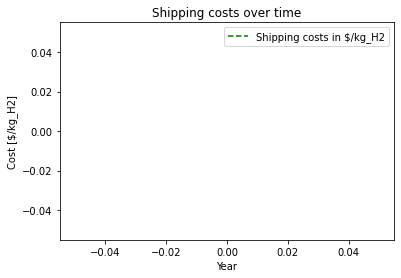

In [34]:
# Plot cost curve of hydrogen production from NGR with CCS
plt.plot(result, color='green', linestyle='dashed')
plt.title('Shipping costs over time')
plt.legend(['Shipping costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()

In [ ]:
#IMPORT TERMINAL

In [325]:
# Definition of variables for the import terminal costs

In [346]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [347]:
# Capex for the import terminal in [$/kg_h2]
capex_it = float(tea_terminals[tea_terminals.Terminals == 'CAPEX ($/tpa)']['Import_Terminal'].values)
capex_it

4939.224387

In [348]:
# Opex in % of capex
opex_share_it = float(tea_terminals[tea_terminals.Terminals == 'Annual OPEX (% of CAPEX)']['Import_Terminal'].values)
opex_share_it

0.04

In [349]:
# Opex for the import terminal in [$/tpa]
opex_it = opex_share_it * capex_it
opex_it

197.56897548

In [355]:
# Electricity consumption for the import terminal in [kWh/kg_h2]
el_it = float(tea_terminals[tea_terminals.Terminals == 'Electricity use (kWh/kgH2)']['Import_Terminal'].values)
el_it

0.61

In [351]:
# Price for electricity in importing country [$/MWh]
p_el


0.0466835326539

In [356]:
# Import terminal boil-off in [%/h]
b_it = float(tea_terminals[tea_terminals.Terminals == 'Boil-off (%/day)']['Import_Terminal'].values)
b_it

0.001

In [358]:
# Berthing time in import terminal in [h]
t_it = float(tea_terminals[tea_terminals.Terminals == 'Storage length per load (d)']['Import_Terminal'].values)
t_it

20.0

In [502]:
# Import terminal costs in [$/kg_h2]:
# Capex for the import terminal in [$/tpa]
# Opex for the import terminal in [$/tpa]
# Electricity consumption for the import terminal in [kWh/kg_h2]
# Price for electricity in importing country [$/MWh]
# Import terminal boil-off in [%/h]
# Berthing time in import terminal in [h]
# Cost of transported hydrogen in [$/kg_h2]
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs(alpha_it, capex_it_y, opex_it_y, el_it, p_el_y, b_it, t_it, lcoh_ngr_y):
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + el_it * p_el_y/1000 + b_it * t_it * lcoh_ngr_y

    return result

In [503]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(ter_time_inputs[ter_time_inputs.Years == year]['CAPEX (tpa) Import Terminal'])
    opex_it_y = float(ter_time_inputs[ter_time_inputs.Years == year]['OPEX (tpa) Import Terminal'])
    p_el_y = float(p_electricity[p_electricity.Years == year]['Norway'])
    lcoh_ngr_y = float(lcoh_ngr[lcoh_ngr.Years == year]['LCOH_NGR'])

    # calculate costs of specific year
    result.Import_terminal_costs.loc[year] = calculate_import_terminal_costs(alpha_it=alpha_it, capex_it_y=capex_it_y,
                                                              opex_it_y=opex_it_y, el_it=el_it, p_el_y=p_el_y, b_it=b_it, t_it=t_it, lcoh_ngr_y=lcoh_ngr_y)

result

,Import_terminal_costs
Years,
2020,0.676458
2021,0.670937
2022,0.726568
2023,0.715581
2024,0.690641
2025,0.686282
2026,0.68199
2027,0.677844
2028,0.673793


In [504]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')

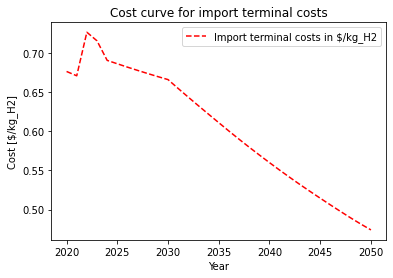

In [370]:
# Plot cost curve of hydrogen production from NGR with CCS
plt.plot(result, color = 'red', linestyle = 'dashed')
plt.title('Cost curve for import terminal costs')
plt.legend(['Import terminal costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()


# Total costs for seaborne transport

In [528]:
liq_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Liquefaction_costs.csv', delimiter=';', decimal=',')
et_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Export_terminal_costs.csv', delimiter=';', decimal=',')
ship_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Shipping_costs.csv', delimiter=';', decimal=',')
it_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Import_terminal_costs.csv', delimiter=';', decimal=',')

In [533]:
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Seaborne_transport_costs'])
result.index.name = 'Years'

In [538]:
# Calculate total transport costs from liquefaction costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs(LC,EC,SC,IC):
    result = LC + EC + SC + IC

    return result

In [539]:
for year in years:
    # get all costs
    LC = float(liq_costs[liq_costs.Years == year]['Liquefaction_costs'])
    EC = float(et_costs[et_costs.Years == year]['Export_terminal_costs'])
    SC = float(ship_costs[ship_costs.Years == year]['Shipping_costs'])
    IC = float(it_costs[it_costs.Years == year]['Import_terminal_costs'])

    # calculate costs of specific year
    result.Seaborne_transport_costs.loc[year] = calculate_seaborne_transport_costs(LC=LC,EC=EC, SC=SC, IC=IC)

result

,Seaborne_transport_costs
Years,
2020,1.915354
2021,1.898957
2022,1.921466
2023,1.899883
2024,1.864839
2025,1.84628
2026,1.826443
2027,1.808378
2028,1.789969


In [540]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Seaborne_transport_costs.csv')
result.to_csv(output_file, sep=';')

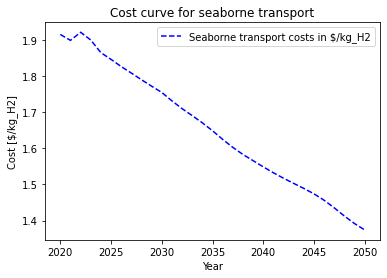

In [541]:
# Plot cost curve for seaborne transport
plt.plot(result, color='blue', linestyle='dashed')
plt.title('Cost curve for seaborne transport')
plt.legend(['Seaborne transport costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()

In [575]:
#TC_pipe_high = 1.5

In [576]:
# Costs for seaborne transport via ship [$/kg_h2]
sea_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Seaborne_transport_costs.csv', delimiter=';', decimal=',')
sea_costs

,Years,Seaborne_transport_costs
0,2020,1.915353652011996
1,2021,1.8989573747072543
2,2022,1.9214664474480345
3,2023,1.8998825964514232
4,2024,1.8648386599485007
5,2025,1.8462804358086857
6,2026,1.826443196032222
7,2027,1.80837768029987
8,2028,1.7899694435995537
9,2029,1.772032066622823


In [577]:
def choose_minimal_transport_costs(TC_pipe_high,TC_sea):
    result = min(TC_pipe_high, TC_sea)

    return result

In [581]:
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_transport_costs'])
result.index.name = 'Years'

for year in years:
    # get all costshas
    TC_sea = float(sea_costs[sea_costs.Years == year]['Seaborne_transport_costs'])

    # calculate costs of specific year
    result.Minimal_transport_costs.loc[year] = choose_minimal_transport_costs(TC_pipe_high=TC_pipe_high,TC_sea=TC_sea)

result

,Minimal_transport_costs
Years,
2020,0.814678
2021,0.814678
2022,0.814678
2023,0.814678
2024,0.814678
2025,0.814678
2026,0.814678
2027,0.814678
2028,0.814678


In [ ]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Minimal_transport_costs.csv')
result.to_csv(output_file, sep=';')

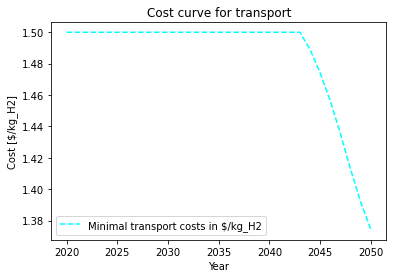

In [574]:
# Plot cost curve for seaborne transport
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()
